In [19]:
import pandas as pd
import numpy as np

# 1. 导入数据
file_path = 'C:/Users/zey9991/Desktop/Pool Metrics_By Efficient Ratio_Table_Data.xlsx'
df = pd.read_excel(file_path)

# 假设第一列是名字列，直接把它提取出来
names_column = df.iloc[:, 0]

# 2. 数据归一化：对数值列进行 Min-Max 标准化，排除第一列
df_numeric = df.iloc[:, 1:]  # 获取数值数据（从第二列开始）

# Min-Max 归一化公式： (X - min(X)) / (max(X) - min(X))
df_normalized = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

# 3. 计算熵值和变异系数
# 先缓存每一列的总和
col_sums = df_normalized.sum(axis=0)

# 计算p_ij，p_ij = a_ij / sum(a_ij) 直接使用缓存的总和
p_ij = df_normalized.div(col_sums, axis=1)

# 由于log(0)是无效的，我们将p_ij中的零替换为一个非常小的值（避免计算log时出现错误）
p_ij = p_ij.replace(0, np.nan)  # 替换零值为NaN
p_ij = p_ij.fillna(1e-10)  # 用一个非常小的正数填充NaN，避免计算log时出错

# 计算熵值 e_j
n = len(df)  # 数据行数
ln_n = np.log(n)  # ln(n)
H_j = - 1 * (p_ij * np.log(p_ij)).sum(axis=0)
e_j = -(1 / ln_n) * (p_ij * np.log(p_ij)).sum(axis=0)

# 变异系数公式：g_j = 1 - e_j
g_j = 1 - e_j

# 保存熵值和变异系数
entropy_df = pd.DataFrame({
    'Shannon Entropy': H_j,
    'Entropy': e_j,
    'Coefficient of Variation': g_j
})




C:\Users\zey9991\AppData\Local\Temp\ipykernel_20016\2860078086.py:15: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df_normalized = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())
C:\Users\zey9991\AppData\Local\Temp\ipykernel_20016\2860078086.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  p_ij = p_ij.replace(0, np.nan)  # 替换零值为NaN


In [28]:
import pandas as pd
import numpy as np

# 2. 数据归一化：对数值列进行 Min-Max 标准化，排除第一列
df_numeric = df.iloc[:, 1:]  # 获取数值数据（从第二列开始）
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# 3. 计算熵值和变异系数
# 先缓存每一列的总和
col_sums = df_numeric.sum(axis=0)

# 计算p_ij，p_ij = a_ij / sum(a_ij) 直接使用缓存的总和
p_ij = df_numeric.div(col_sums, axis=1)

# 由于log(0)是无效的，我们将p_ij中的零替换为一个非常小的值（避免计算log时出现错误）
p_ij = p_ij.replace(0, np.nan)  # 替换零值为NaN
p_ij = p_ij.fillna(1e-10)  # 用一个非常小的正数填充NaN，避免计算log时出错

# 计算熵值 e_j
n = len(df)  # 数据行数
ln_n = np.log(n)  # ln(n)
H_j = - 1 * (p_ij * np.log(p_ij)).sum(axis=0)
e_j = -(1 / ln_n) * (p_ij * np.log(p_ij)).sum(axis=0)

# 变异系数公式：g_j = 1 - e_j
g_j = 1 - e_j

# 保存熵值和变异系数
entropy_df2 = pd.DataFrame({
    'Shannon Entropy': H_j,
    'Entropy': e_j,
    'Coefficient of Variation': g_j
})




d:\anaconda3\envs\mcmicm2024\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [30]:
entropy_df

,Shannon Entropy,Entropy,Coefficient of Variation
Fee Tier,4.781500,0.877172,0.122828
Start Date String,5.358380,0.983002,0.016998
AverageIY,4.885521,0.896255,0.103745
Average Daily LP TVL,4.539586,0.832793,0.167207
Total Swap Fee,3.847213,0.705776,0.294224
Total Swap Fee (im+ex),3.953535,0.725281,0.274719
Average Daily Swap Fee,3.875398,0.710947,0.289053
EfficientRatio*,4.499432,0.825427,0.174573
EfficientRatioB**,4.657781,0.854476,0.145524


In [29]:
entropy_df2

,Shannon Entropy,Entropy,Coefficient of Variation
Fee Tier,4.951736,0.908402,0.091598
Start Date String,-0.000000,-0.000000,1.000000
AverageIY,5.026413,0.922102,0.077898
Average Daily LP TVL,4.550707,0.834833,0.165167
Total Swap Fee,3.852972,0.706833,0.293167
Total Swap Fee (im+ex),3.959978,0.726463,0.273537
Average Daily Swap Fee,3.882840,0.712312,0.287688
EfficientRatio*,4.511513,0.827643,0.172357
EfficientRatioB**,4.657781,0.854476,0.145524


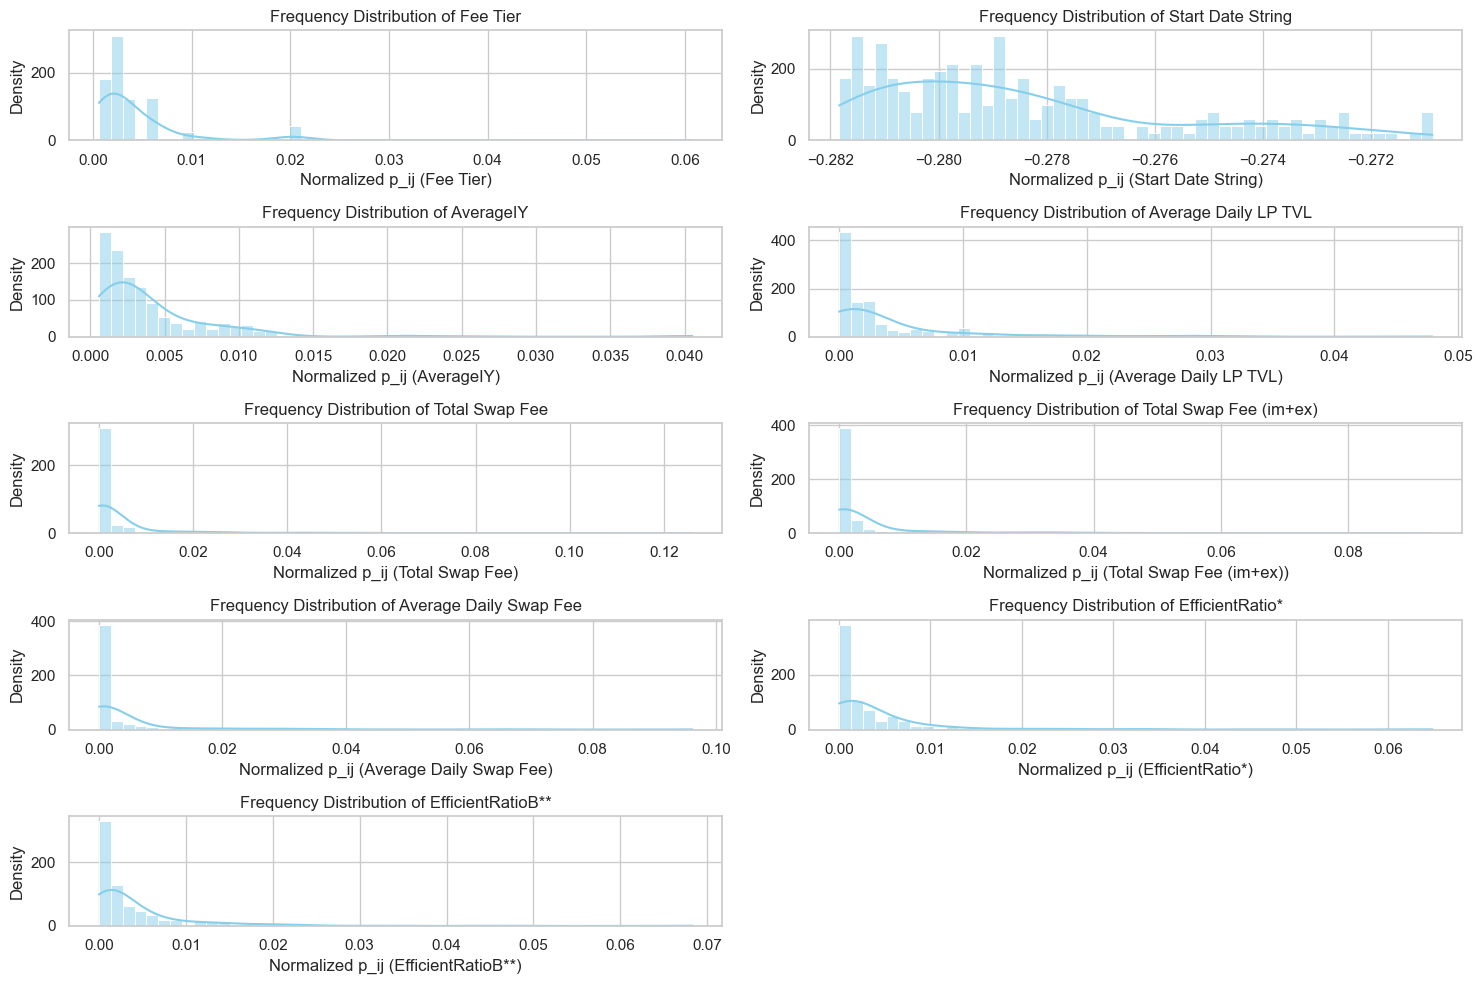

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# 4. 绘制每列的频率分布直方图
# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个图形窗口
plt.figure(figsize=(15, 10))

# 遍历每一列并绘制直方图
for idx, col in enumerate(p_ij.columns):
    plt.subplot(len(p_ij.columns) // 2 + 1, 2, idx + 1)  # 每行最多2个子图
    sns.histplot(p_ij[col], bins=50, kde=True, color="skyblue", stat="density")
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(f"Normalized p_ij ({col})")
    plt.ylabel("Density")

# 自动调整布局，避免重叠
plt.tight_layout()
plt.show()

In [7]:
df_normalized

,Fee Tier,Start Date String,AverageIY,Average Daily LP TVL,Total Swap Fee,Total Swap Fee (im+ex),Average Daily Swap Fee,EfficientRatio*,EfficientRatioB**
0,0.023569,0.84802,0.098545,1.0,0.445059,0.513194,0.405868,0.037919,0.06383
1,0.0,0.526181,0.166005,0.911532,0.178719,0.774006,0.120507,0.046567,0.123404
2,0.057239,0.920817,0.111772,0.665664,0.19789,0.218251,0.313331,0.042177,0.029787
3,0.040404,0.971903,0.027778,0.657603,0.0009,0.000915,0.003411,0.0,0.0
4,0.040404,0.885057,0.013889,0.605863,0.002927,0.003673,0.004003,0.000266,0.004255
...,...,...,...,...,...,...,...,...,...
228,0.023569,0.454662,0.078042,0.000543,0.000143,0.000649,0.000094,0.054417,0.042553
229,0.006734,0.025543,0.631614,0.000495,0.00011,0.000799,0.000037,0.057078,0.017021
230,0.023569,0.745849,0.099206,0.000364,0.000027,0.00048,0.000075,0.112693,0.06383
231,0.006734,0.140485,0.039683,0.000298,0.001064,0.003428,0.002939,1.0,0.217021


In [10]:
from scipy.stats import kurtosis, skew
# 强制转换所有列为数值类型
df_normalized = df_normalized.apply(pd.to_numeric, errors='coerce')

# 3. 计算描述性统计指标
descriptive_stats = pd.DataFrame()

# 对每一列计算各种描述性统计指标
descriptive_stats['Max'] = df_normalized.max()
descriptive_stats['Min'] = df_normalized.min()
descriptive_stats['Mean'] = df_normalized.mean()
descriptive_stats['Median'] = df_normalized.median()
descriptive_stats['Mode'] = df_normalized.mode().iloc[0]  # 众数，返回最频繁的值
descriptive_stats['Std'] = df_normalized.std()
descriptive_stats['Variance'] = df_normalized.var()

# 计算峰度和偏度，确保只对数值类型的列计算
descriptive_stats['Kurtosis'] = df_normalized.apply(lambda x: kurtosis(x, nan_policy='omit'))
descriptive_stats['Skewness'] = df_normalized.apply(lambda x: skew(x, nan_policy='omit'))

# 4. 展示结果
descriptive_stats

,Max,Min,Mean,Median,Mode,Std,Variance,Kurtosis,Skewness
Fee Tier,1.0,0.0,0.061256,0.023569,0.023569,0.096624,0.009336,38.657168,5.050755
Start Date String,1.0,0.0,0.682069,0.739464,0.819923,0.258619,0.066884,-0.048630,-0.943875
AverageIY,1.0,0.0,0.092893,0.048280,0.009921,0.126439,0.015987,22.269049,4.024308
Average Daily LP TVL,1.0,0.0,0.089143,0.033366,0.000000,0.152977,0.023402,10.789014,3.055614
Total Swap Fee,1.0,0.0,0.033995,0.002303,0.000027,0.095998,0.009216,46.312272,5.818951
Total Swap Fee (im+ex),1.0,0.0,0.045956,0.003956,0.000000,0.117229,0.013743,25.951056,4.517883
Average Daily Swap Fee,1.0,0.0,0.044558,0.003327,0.000240,0.118113,0.013951,25.385374,4.535355
EfficientRatio*,1.0,0.0,0.065787,0.020490,0.006519,0.127984,0.016380,23.837695,4.420881
EfficientRatioB**,1.0,0.0,0.062844,0.021277,0.008511,0.106595,0.011363,29.691339,4.541365


In [1]:
import numpy as np
import scipy.optimize as opt

# 定义常量
COEFF_0 = 0.04397455  # 常数项
COEFF_1 = -8.25       # x 的系数
COEFF_2 = 3999.2      # x^2 的系数
COEFF_3 = -132549.2   # x^3 的系数

# 初始猜测值列表
initial_guesses = [0.0003, 0.02]

# 存储找到的解
solutions = []

# 定义目标函数 y = COEFF_0 + COEFF_1*x + COEFF_2*x^2 + COEFF_3*x^3
def func(x):
    return COEFF_0 + COEFF_1 * x + COEFF_2 * x**2 + COEFF_3 * x**3

# 定义一阶导数 y' = COEFF_1 + 2*COEFF_2*x + 3*COEFF_3*x^2
def derivative(x):
    return COEFF_1 + 2 * COEFF_2 * x + 3 * COEFF_3 * x**2

# 定义二阶导数 y'' = 2*COEFF_2 + 6*COEFF_3*x
def second_derivative(x):
    return 2 * COEFF_2 + 6 * COEFF_3 * x

# 对每个初始猜测值进行求解
for guess in initial_guesses:
    critical_point = opt.fsolve(derivative, x0=guess)[0]
    if critical_point not in solutions:
        solutions.append(critical_point)

# 判断每个临界点的二阶导数值，确定极值点的性质
for x in solutions:
    y_prime_prime = second_derivative(x)
    if y_prime_prime < 0:
        extremum_type = "maximum"
    elif y_prime_prime > 0:
        extremum_type = "minimum"
    else:
        extremum_type = "inconclusive"
    
    y_value = func(x)
    print(f"At x = {x:.5f}, y = {y_value:.5f} ({extremum_type})")


At x = 0.00109, y = 0.03956 (minimum)
At x = 0.01902, y = 0.42178 (maximum)


In [3]:
import numpy as np
import scipy.optimize as opt

# Robustness--Chain

# 定义常量
COEFF_00 = 0.0167  # 常数项
COEFF_01 = 0.03327585  #其他变量取中位数之和
COEFF_1 = -10.98       # x 的系数
COEFF_2 = 4559.6      # x^2 的系数
COEFF_3 = -155741.6   # x^3 的系数

# 初始猜测值列表
initial_guesses = [0.0003, 0.02]

# 存储找到的解
solutions = []

# 定义目标函数 y = COEFF_0 + COEFF_1*x + COEFF_2*x^2 + COEFF_3*x^3
def func(x):
    return COEFF_00+COEFF_01 + COEFF_1 * x + COEFF_2 * x**2 + COEFF_3 * x**3

# 定义一阶导数 y' = COEFF_1 + 2*COEFF_2*x + 3*COEFF_3*x^2
def derivative(x):
    return COEFF_1 + 2 * COEFF_2 * x + 3 * COEFF_3 * x**2

# 定义二阶导数 y'' = 2*COEFF_2 + 6*COEFF_3*x
def second_derivative(x):
    return 2 * COEFF_2 + 6 * COEFF_3 * x

# 对每个初始猜测值进行求解
for guess in initial_guesses:
    critical_point = opt.fsolve(derivative, x0=guess)[0]
    if critical_point not in solutions:
        solutions.append(critical_point)

# 判断每个临界点的二阶导数值，确定极值点的性质
for x in solutions:
    y_prime_prime = second_derivative(x)
    if y_prime_prime < 0:
        extremum_type = "maximum"
    elif y_prime_prime > 0:
        extremum_type = "minimum"
    else:
        extremum_type = "inconclusive"
    
    y_value = func(x)
    print(f"At x = {x:.5f}, y = {y_value:.5f} ({extremum_type})")


At x = 0.00129, y = 0.04306 (minimum)
At x = 0.01823, y = 0.42157 (maximum)


In [4]:
import numpy as np
import scipy.optimize as opt

# Robustness--YieldSource

# 定义常量
COEFF_00 = 0.00358      # 常数项
COEFF_01 = -0.0029025       # 其他变量取中位数之和
COEFF_1 = 41.10       # x 的系数
COEFF_2 = -13558.1       # x^2 的系数
COEFF_3 = 1683360.6    # x^3 的系数
COEFF_4 = -53133753.4     # x^4 的系数，假设的四次项系数

# 初始猜测值列表
initial_guesses = [0.0003, 0.02]

# 存储找到的解
solutions = []

# 定义目标函数 y = COEFF_0 + COEFF_1*x + COEFF_2*x^2 + COEFF_3*x^3 + COEFF_4*x^4
def func(x):
    return (COEFF_00+ COEFF_01 +
            COEFF_1 * x +
            COEFF_2 * x**2 +
            COEFF_3 * x**3 +
            COEFF_4 * x**4)

# 定义一阶导数 y' = COEFF_1 + 2*COEFF_2*x + 3*COEFF_3*x^2 + 4*COEFF_4*x^3
def derivative(x):
    return (COEFF_1 +
            2 * COEFF_2 * x +
            3 * COEFF_3 * x**2 +
            4 * COEFF_4 * x**3)

# 定义二阶导数 y'' = 2*COEFF_2 + 6*COEFF_3*x + 12*COEFF_4*x^2
def second_derivative(x):
    return (2 * COEFF_2 +
            6 * COEFF_3 * x +
            12 * COEFF_4 * x**2)

# 对每个初始猜测值进行求解
for guess in initial_guesses:
    critical_points = opt.fsolve(derivative, x0=guess)
    for point in critical_points:
        if point not in solutions:
            solutions.append(point)

# 判断每个临界点的二阶导数值，确定极值点的性质
for x in solutions:
    y_prime_prime = second_derivative(x)
    if y_prime_prime < 0:
        extremum_type = "maximum"
    elif y_prime_prime > 0:
        extremum_type = "minimum"
    else:
        extremum_type = "inconclusive"
    
    y_value = func(x)
    print(f"At x = {x:.5f}, y = {y_value:.5f} ({extremum_type})")


At x = 0.00283, y = 0.04315 (maximum)
At x = 0.01688, y = 0.61392 (maximum)


In [13]:
import numpy as np
import scipy.optimize as opt

# Hetero -- BaseAsset==ETH

# 定义常量
COEFF_00 = 0.115  # 常数项
COEFF_01 = 0.00000559*142  #其他变量取中位数之和
COEFF_1 = -135.8       # x 的系数
COEFF_2 = 48714.1      # x^2 的系数
COEFF_3 = -3459493.1   # x^3 的系数

# 初始猜测值列表
initial_guesses = [0.0003, 0.02]

# 存储找到的解
solutions = []

# 定义目标函数 y = COEFF_0 + COEFF_1*x + COEFF_2*x^2 + COEFF_3*x^3
def func(x):
    return COEFF_00+COEFF_01 + COEFF_1 * x + COEFF_2 * x**2 + COEFF_3 * x**3

# 定义一阶导数 y' = COEFF_1 + 2*COEFF_2*x + 3*COEFF_3*x^2
def derivative(x):
    return COEFF_1 + 2 * COEFF_2 * x + 3 * COEFF_3 * x**2

# 定义二阶导数 y'' = 2*COEFF_2 + 6*COEFF_3*x
def second_derivative(x):
    return 2 * COEFF_2 + 6 * COEFF_3 * x

# 对每个初始猜测值进行求解
for guess in initial_guesses:
    critical_point = opt.fsolve(derivative, x0=guess)[0]
    if critical_point not in solutions:
        solutions.append(critical_point)

# 判断每个临界点的二阶导数值，确定极值点的性质
for x in solutions:
    y_prime_prime = second_derivative(x)
    if y_prime_prime < 0:
        extremum_type = "maximum"
    elif y_prime_prime > 0:
        extremum_type = "minimum"
    else:
        extremum_type = "inconclusive"
    
    y_value = func(x)
    print(f"(FeeTier = {x:.5f}, EfficientRatio = {y_value:.5f})({extremum_type})")


(FeeTier = 0.00170, EfficientRatio = 0.00872)(minimum)
(FeeTier = 0.00768, EfficientRatio = 0.37903)(maximum)


In [14]:
import numpy as np
import scipy.optimize as opt

# Hetero -- BaseAsset==Stable

# 定义常量
COEFF_00 = 0.0232  # 常数项
COEFF_01 = -0.000196*129  #其他变量取中位数之和
COEFF_1 = 63.25       # x 的系数
COEFF_2 = -16615.4    # x^2 的系数
COEFF_3 = 1276871.6   # x^3 的系数

# 初始猜测值列表
initial_guesses = [0.0003, 0.02]

# 存储找到的解
solutions = []

# 定义目标函数 y = COEFF_0 + COEFF_1*x + COEFF_2*x^2 + COEFF_3*x^3
def func(x):
    return COEFF_00+COEFF_01 + COEFF_1 * x + COEFF_2 * x**2 + COEFF_3 * x**3

# 定义一阶导数 y' = COEFF_1 + 2*COEFF_2*x + 3*COEFF_3*x^2
def derivative(x):
    return COEFF_1 + 2 * COEFF_2 * x + 3 * COEFF_3 * x**2

# 定义二阶导数 y'' = 2*COEFF_2 + 6*COEFF_3*x
def second_derivative(x):
    return 2 * COEFF_2 + 6 * COEFF_3 * x

# 对每个初始猜测值进行求解
for guess in initial_guesses:
    critical_point = opt.fsolve(derivative, x0=guess)[0]
    if critical_point not in solutions:
        solutions.append(critical_point)

# 判断每个临界点的二阶导数值，确定极值点的性质
for x in solutions:
    y_prime_prime = second_derivative(x)
    if y_prime_prime < 0:
        extremum_type = "maximum"
    elif y_prime_prime > 0:
        extremum_type = "minimum"
    else:
        extremum_type = "inconclusive"
    
    y_value = func(x)
    print(f"(FeeTier = {x:.5f}, EfficientRatio = {y_value:.5f})({extremum_type})")


(FeeTier = 0.00282, EfficientRatio = 0.07278)(maximum)
(FeeTier = 0.00585, EfficientRatio = 0.05494)(minimum)
